<a href="https://colab.research.google.com/github/fahadrajput99/deep-learning/blob/main/astism_face_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE=224
batch_size = 32
channel = 3
epochs=10

In [5]:
from google.colab import drive
import tensorflow as tf

# Mount Google Drive if the dataset is stored there
drive.mount('/content/drive')

# Define parameters
IMAGE_SIZE = 224  # Set your desired image size
BATCH_SIZE = 32   # Set your batch size

# Path to dataset (adjust the path accordingly)
dataset_path = "/content/drive/MyDrive/Colab Notebooks/autism_dataset_face"

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

# Check dataset class names
class_names = dataset.class_names
print("Class names:", class_names)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2536 files belonging to 2 classes.
Class names: ['autistic', 'non_autistic']


In [6]:
class_name=dataset.class_names
class_name

['autistic', 'non_autistic']

In [7]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.numpy().shape)

(32, 224, 224, 3)


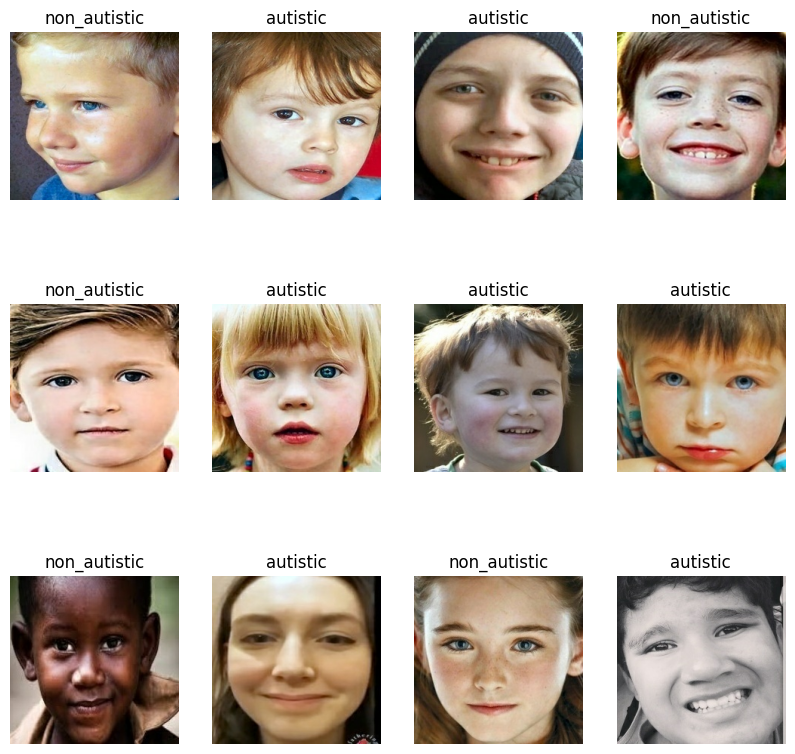

In [8]:
plt.figure(figsize = (10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3 , 4 , i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [ ]:
train_ds = 0.8
len(dataset)*train_ds

12.0

In [ ]:
test_ds=dataset.skip(24)
len(test_ds)

0

In [ ]:
val_size = test_ds.take(6)
len(val_size)

0

In [9]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [34]:
len(dataset)

80

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
resizing_rescaling = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.Rescaling(1.0/255)

])

In [14]:
data_augmentaion = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)

])

In [15]:
N_CLASSES = 2     # Number of classes

# Define input shape for the first layer
input_shape = (IMAGE_SIZE, IMAGE_SIZE, channel)  # Removed batch_size

# Define the model
model = models.Sequential([
    # Resizing and rescaling layer (specify input shape here)
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),
    layers.Rescaling(1.0/255),

    # Data augmentation layer
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(N_CLASSES, activation="softmax")
])

# Model summary to check the architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_1 (RandomFlip)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,394 (669.51 KB)

 Trainable params: 171,394 (669.51 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer = "adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"])

In [17]:
history = model.fit(
    train_ds,
    epochs=40,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val_ds)


Epoch 1/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 265s 174ms/step - accuracy: 0.4715 - loss: 0.6964 - val_accuracy: 0.4922 - val_loss: 0.6930
Epoch 2/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 62s 43ms/step - accuracy: 0.5087 - loss: 0.6930 - val_accuracy: 0.5586 - val_loss: 0.6821
Epoch 3/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4985 - loss: 0.6918 - val_accuracy: 0.4922 - val_loss: 0.6932
Epoch 4/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5044 - loss: 0.6931 - val_accuracy: 0.5859 - val_loss: 0.6924
Epoch 5/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5377 - loss: 0.6917 - val_accuracy: 0.5078 - val_loss: 0.6909
Epoch 6/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5217 - loss: 0.6925 - val_accuracy: 0.5117 - val_loss: 0.6929
Epoch 7/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5271 - loss: 0.6920 - val_accuracy: 0.5195 - val_loss: 0.6743
Epoch 8/40
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5702 - loss: 0.6756 - val_accuracy: 0.5859

In [18]:
score = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7332 - loss: 0.5295


In [19]:
score

[0.5382667183876038, 0.734375]

In [20]:
import numpy as np
score=model.predict(train_ds)
predicted_labels = np.argmax(score, axis=1)
predicted_labels


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


array([1, 0, 0, ..., 0, 1, 0])

In [21]:
history

In [22]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 64}

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [24]:
history.history["accuracy"]

[0.47412109375,
 0.50390625,
 0.48828125,
 0.50537109375,
 0.54638671875,
 0.52783203125,
 0.5439453125,
 0.576171875,
 0.60693359375,
 0.60888671875,
 0.60107421875,
 0.61865234375,
 0.6396484375,
 0.6220703125,
 0.638671875,
 0.6357421875,
 0.65380859375,
 0.64306640625,
 0.67041015625,
 0.66796875,
 0.6806640625,
 0.68994140625,
 0.67041015625,
 0.689453125,
 0.685546875,
 0.67919921875,
 0.697265625,
 0.68701171875,
 0.7001953125,
 0.69482421875,
 0.70166015625,
 0.68994140625,
 0.70703125,
 0.6875,
 0.69970703125,
 0.720703125,
 0.6943359375,
 0.7041015625,
 0.7060546875,
 0.69580078125]

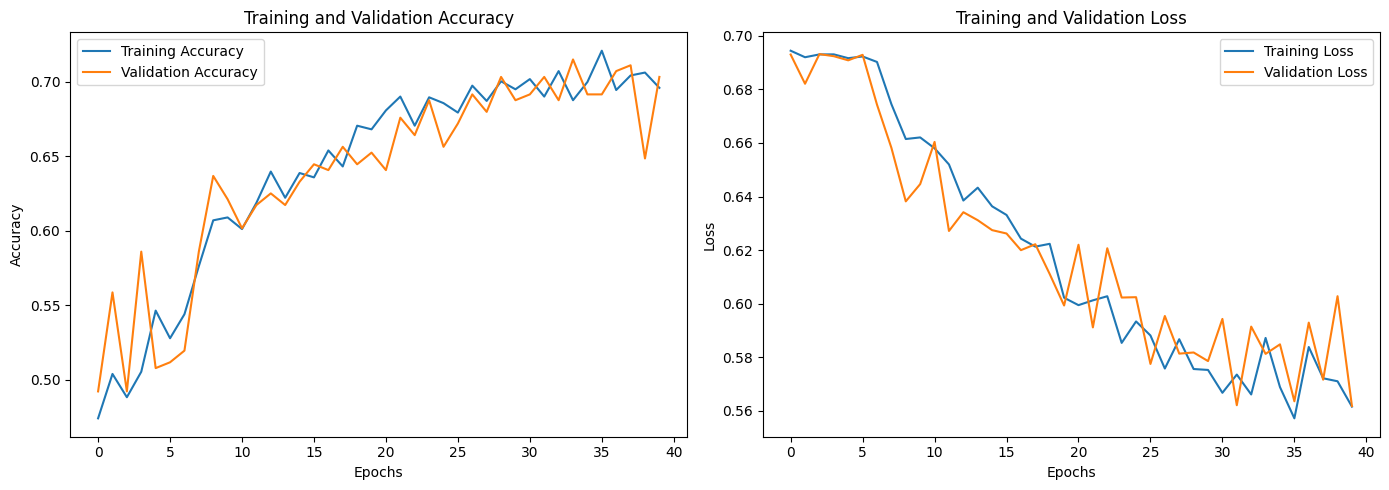

In [25]:
import matplotlib.pyplot as plt

# Extracting metrics from history
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Determining the number of epochs
epochs = range(len(acc))

# Plotting training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


first image to predict
actual_label: autistic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
predicted_label: autistic


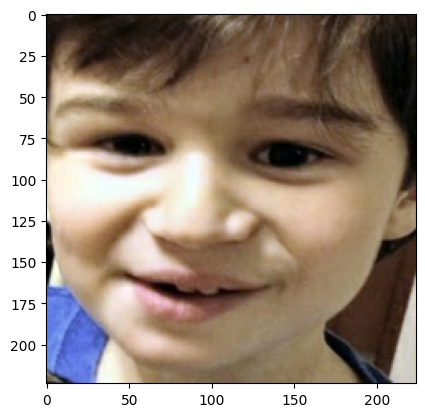

In [26]:
for image_batch , label_batch in test_ds.take(1):
    first_image =(image_batch[0].numpy().astype ("uint8"))
    first_label= label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual_label:" , class_name[first_label])

    batch_prediction=model.predict(image_batch)
    print("predicted_label:" , class_name[np.argmax(batch_prediction[0])])

In [27]:
def predict(model , img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array , 0)

    prediction=model.predict(img_array)

    prediction_class=class_name[np.argmax(batch_prediction[0])]
    confidence=round(100*(np.max(prediction[0])) , 2)
    return prediction_class , confidence


In [29]:
print(f"Label index: {label_batch[0]}, Actual class: {class_name[label_batch[0]]}")


Label index: 0, Actual class: autistic


In [30]:
for i in range(5):
    actual_class = class_name[label_batch[i].numpy()]
    predicted_class, confidence = predict(model, image_batch[i].numpy())
    print(f"Actual: {actual_class}, Predicted: {predicted_class}, Confidence: {confidence:.2f}%")


NameError: name 'images' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


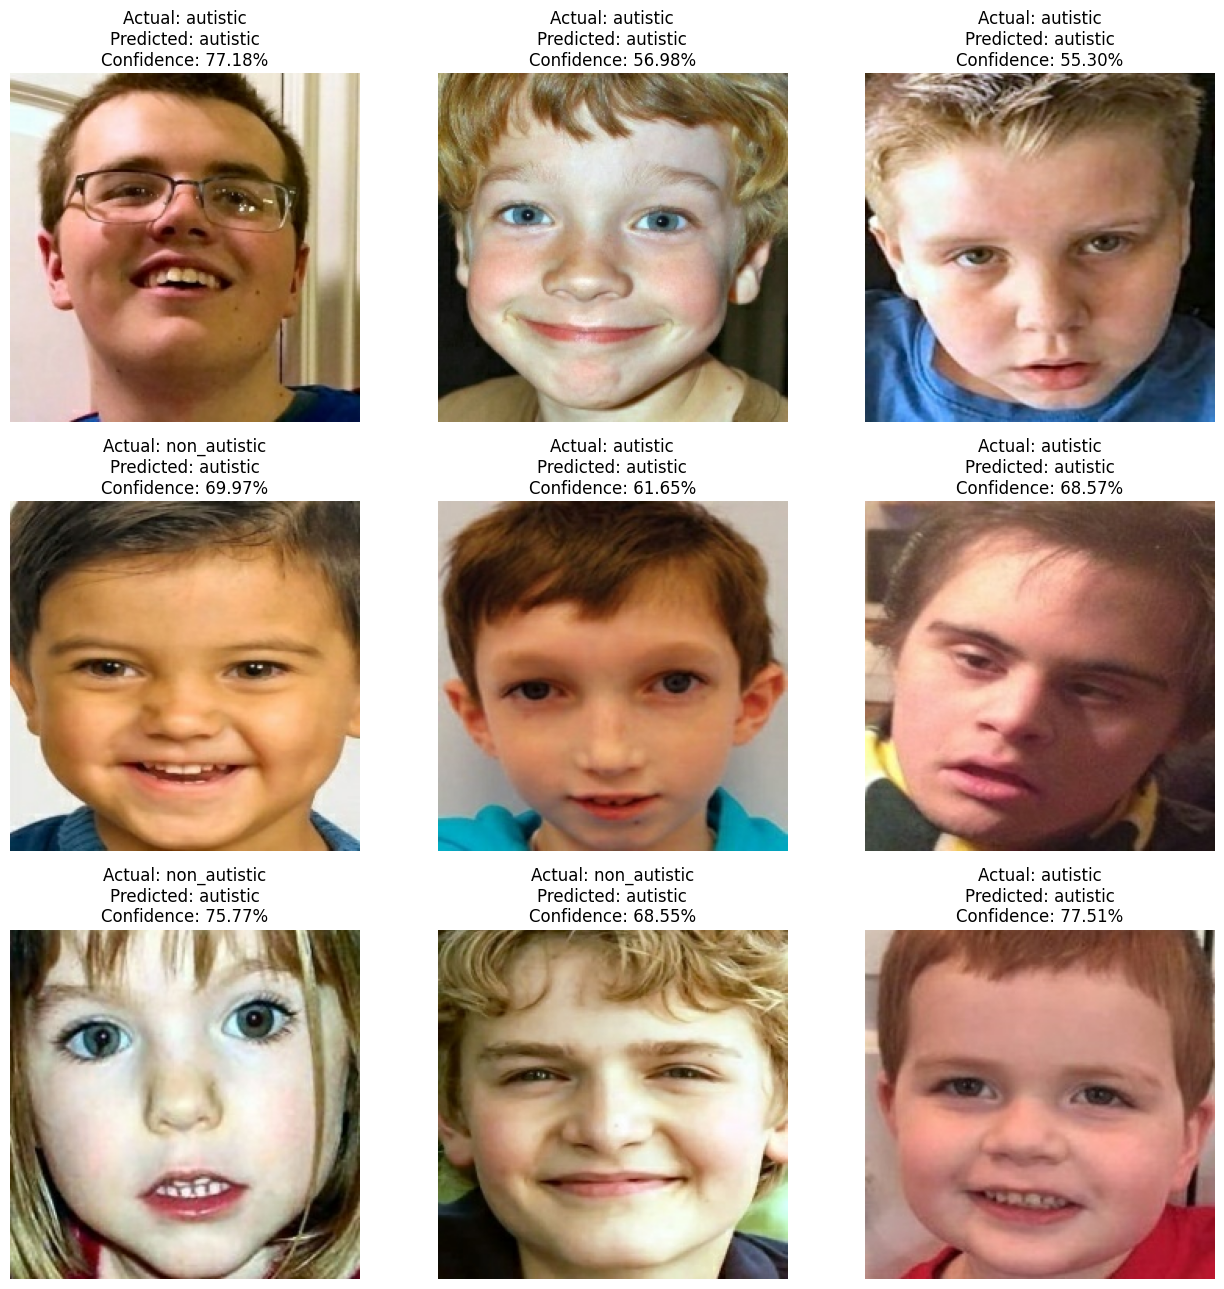

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))

# Taking one batch from the test dataset
for images, labels in test_ds.take(1):
    # Iterating through the first 9 images in the batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
        plt.imshow(images[i].numpy().astype("uint8"))  # Display the image

        # Predict the class and confidence
        predicted_class, confidence = predict(model, images[i].numpy())

        # Get the actual class name from labels
        actual_class = class_name[labels[i]]

        # Set the title of each subplot
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
        plt.axis("off")  # Turn off the axis

plt.tight_layout()  # Adjust layout for better display
plt.show()


In [32]:
model_version = 1
model.save(f"model_{model_version}.keras")  # Add .keras extension